In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

pd.options.display.max_columns = None

In [2]:
dataset = pd.read_csv("data/housing-price/03_House_Prices.csv")
dataset = dataset.set_index('Id')

In [3]:
dataset.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,

These are a lot of features. Trying to figure out the good and meaningful ones

Most of the categorical variables have 2-4 unique values and they are highly skwed on 1 value, meaning data is Over and under represented.

# Correlation Matrix

Text(0.5, 1.05, 'Correlation Matrix')

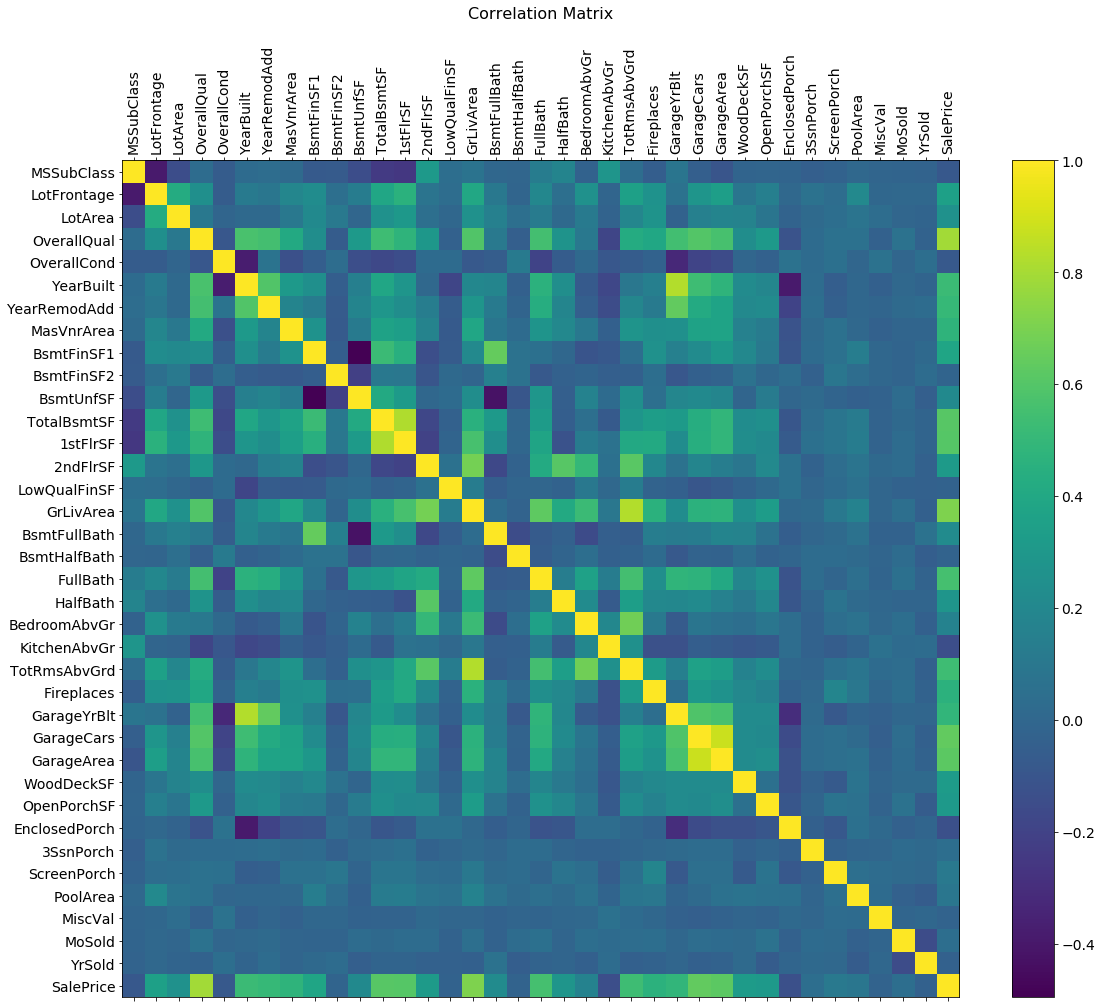

In [4]:
plot = plt.figure(figsize=(19, 15))
plt.matshow(dataset.corr(), fignum=plot.number)
plt.xticks(range(dataset.describe().shape[1]), dataset.describe().columns, fontsize=14, rotation=90)
plt.yticks(range(dataset.describe().shape[1]), dataset.describe().columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation Matrix", fontsize=16, pad=100)

In [5]:
dataset.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [6]:
#Columns which have good correlation with SalesPrice (target variable)
cols = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 
        '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']

**I am not sure of how OverallQual is calculated, but I assume varibles with having suffix/prefix condition/quality are already included in variable "OverallQual". **

# Useful Insights

## 1. Correlation between candidate columns (Checking for Multi-Collinearity)

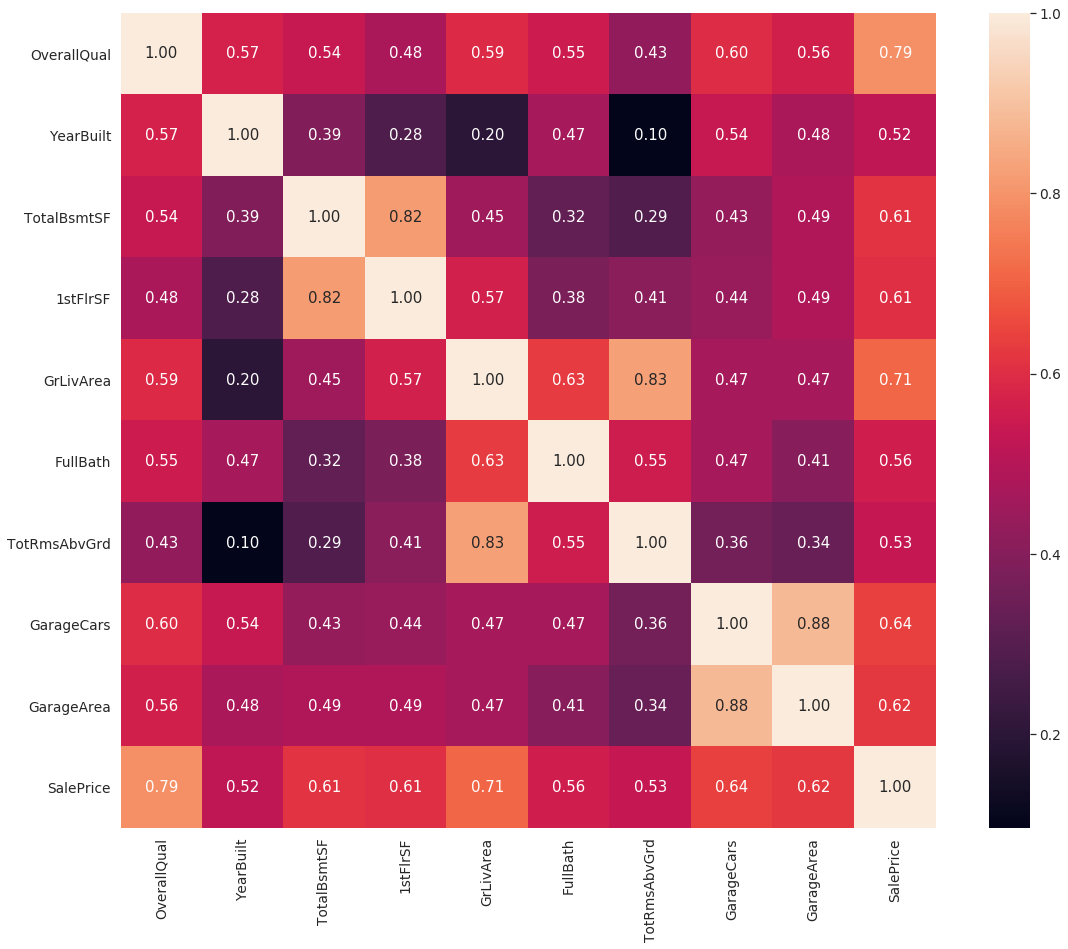

In [7]:
newCorrMat = np.corrcoef(dataset[cols].values.T)
size = plt.figure(figsize=(19,15))
sns.set(font_scale=1.25)
heatM = sns.heatmap(newCorrMat, annot=True, cbar=True, square=True, fmt='0.2f', 
                    xticklabels=cols, yticklabels=cols)
plt.show()

**Drawing conclusions from above heatmap**
> **MultiCollinearity**
>> '1stFlrSF' and 'TotalBsmtSF' are highly correlated with each other, meaning both participate in the result insimilar way. It is a problem of "MultiCollinearity". I'll choose one which is highly correlated with SalePrice i.e. 'TotalBsmtSF'. 
>> Same goes with 'TotRmsAbvGrd' and 'GrLivArea', I am choosing 'GrLivArea'.
>> Same goes with 'GarageArea' and 'GarageCars', I am choosing GarageCars

> 'YearBuilt' is an important attribute, however it is not shown so here.
> 'OverallQual', 'GrLivArea' are clear winners, as they are highly correlated with SalePrice
> 'FullBath' does not show any resembleness to me, but data suggest so I am keeping it.

**Let's plot scatterplot matrix to see how are these values shown on Graph**

## 2. Scatter plot of chosen features

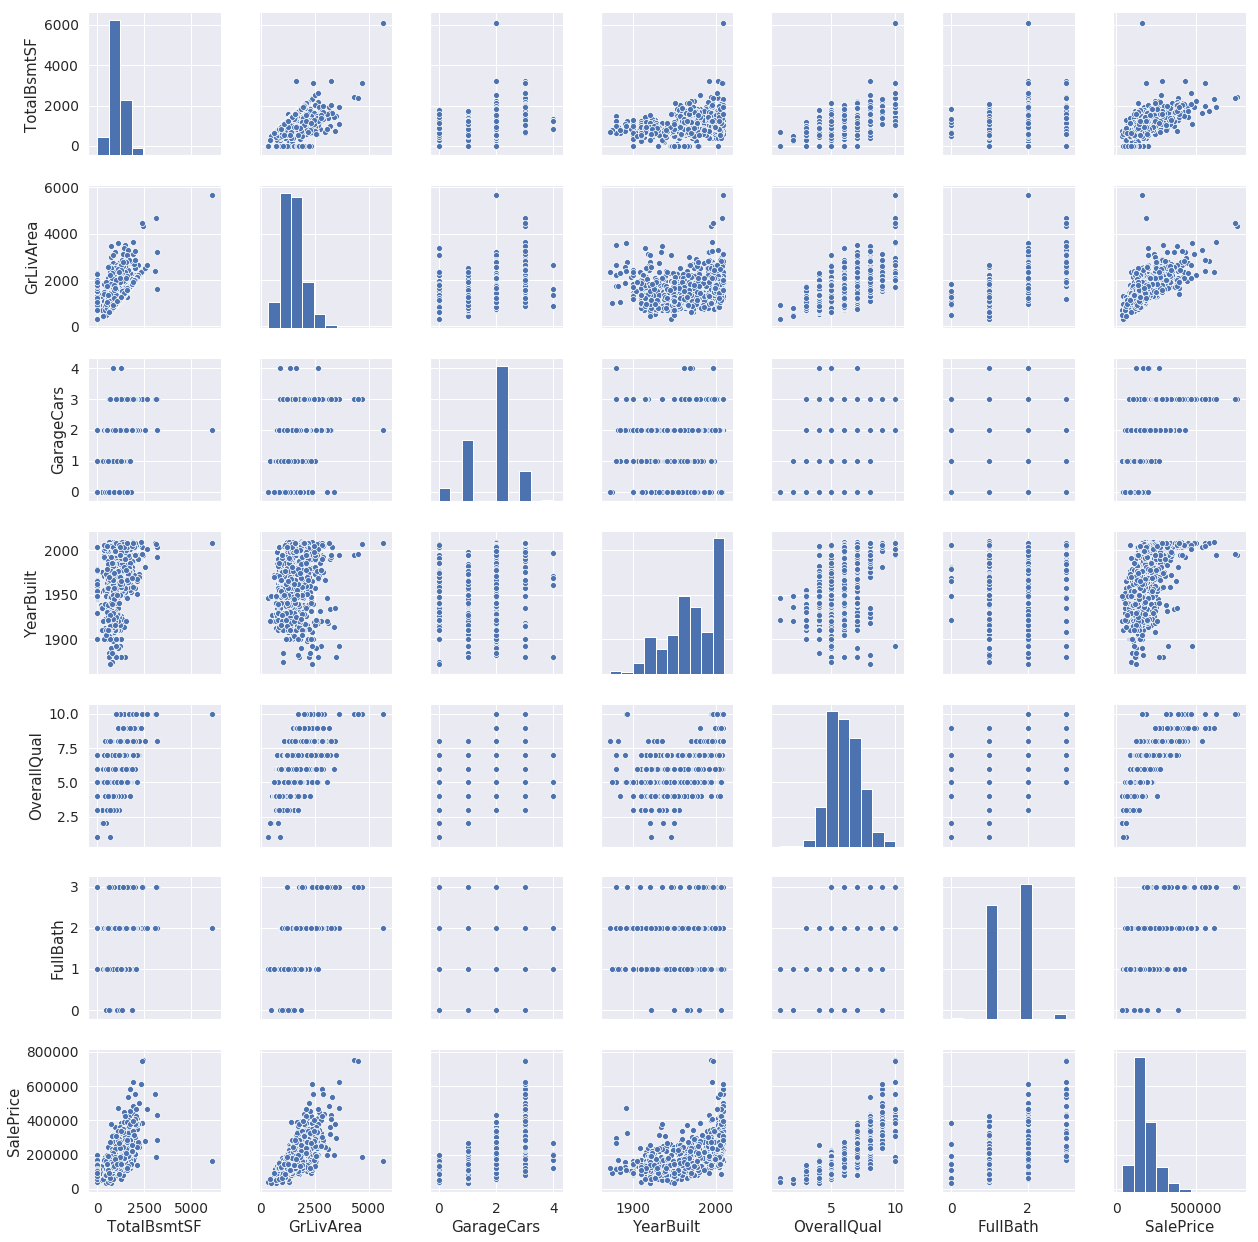

In [8]:
newCols = ['TotalBsmtSF', 'GrLivArea', 'GarageCars', 'YearBuilt', 'OverallQual', 'FullBath', 'SalePrice']
newDf = dataset[newCols]
sns.pairplot(newDf)

We'll use plots for detecting outliers.

In [9]:
newDf.isna().count()

TotalBsmtSF    1460
GrLivArea      1460
GarageCars     1460
YearBuilt      1460
OverallQual    1460
FullBath       1460
SalePrice      1460
dtype: int64

**Well, luckily I do not have any missing values**

## 3. Check for Outliers

From the scatter plots above, I am now trying to see if there's any outliers in our data and if there is then remove them

**Small utility for showing Scatter plot between columns**

In [10]:
def scatterPlot(x, y, xlabel, ylabel, title):
    plt.scatter(x=x, y=y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

### 3.1 TotalBsmtSF vs SalePrice

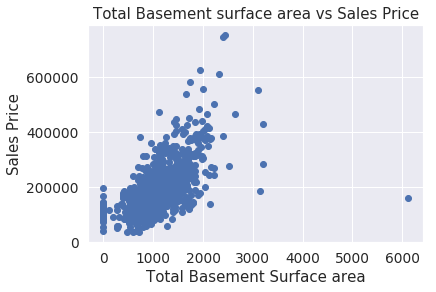

In [11]:
scatterPlot(newDf.TotalBsmtSF, newDf.SalePrice, 'Total Basement Surface area', 'Sales Price', 
           'Total Basement surface area vs Sales Price')

Okay, so point where x>6000 seems to be little odd. This house suggests that it has largest surface area and is available in very cheap price. Maybe it's a steal deal but I think it will affect my predictions so removing it

In [12]:
newDf = newDf.drop(newDf[newDf.TotalBsmtSF > 6000].index)

### 3.2 GrLivArea vs SalePrice 

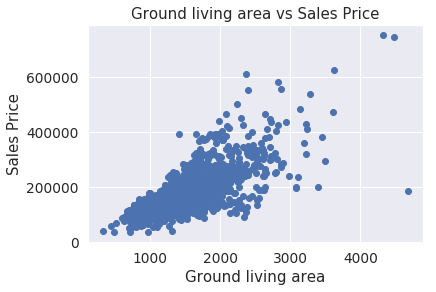

In [13]:
scatterPlot(newDf.GrLivArea, newDf.SalePrice, 'Ground living area', 'Sales Price', 
           'Ground living area vs Sales Price')

Two values with ground area greater than 4000 has price over 600000 which seems reasonable, but one house with living area greater than 4000 has price less than 200000. Seems outlier to me, hence removing this.

In [14]:
newDf = newDf.drop(newDf[(newDf.GrLivArea>4000) & (newDf.SalePrice<200000)].index)

### 3.3 Garage Car vs SalePrice

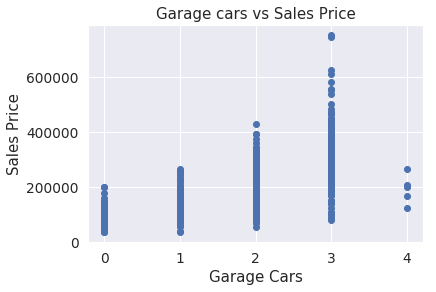

In [15]:
scatterPlot(newDf.GarageCars, newDf.SalePrice, 'Garage Cars', 'Sales Price', 
           'Garage cars vs Sales Price')

### 3.4 YearBuilt vs SalePrice

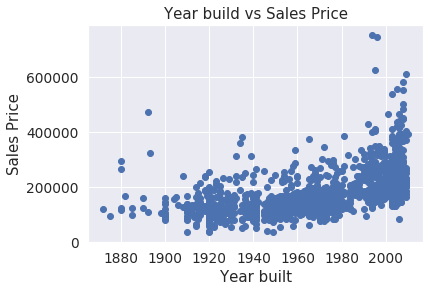

In [16]:
scatterPlot(newDf.YearBuilt, newDf.SalePrice, 'Year built', 'Sales Price', 
           'Year build vs Sales Price')

### 3.5 OverallQual vs SalePrice

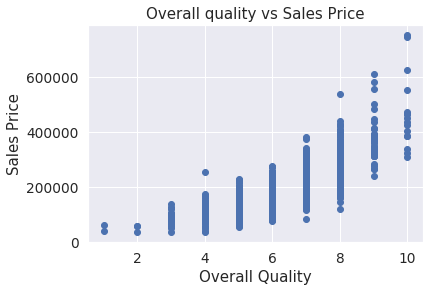

In [17]:
scatterPlot(newDf.OverallQual, newDf.SalePrice, 'Overall Quality', 'Sales Price', 
           'Overall quality vs Sales Price')

Overall quantity with some value 1 has very low sales price, but that seems okay, as the value is increasing, sales price is also increasing. 

### 3.6 FullBath vs SalePrice

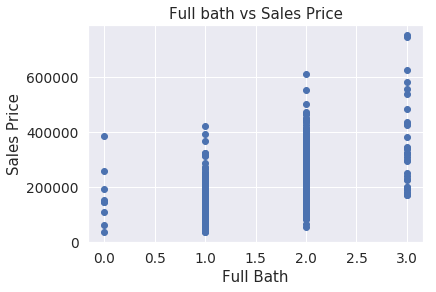

In [18]:
scatterPlot(newDf.FullBath, newDf.SalePrice, 'Full Bath', 'Sales Price', 
           'Full bath vs Sales Price')

## Now that I don't have any outliers left in my Data. Let's see if I need any data transformation

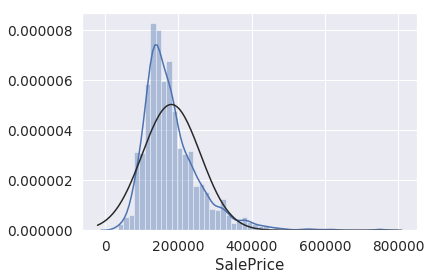

In [19]:
sns.distplot(newDf.SalePrice, fit=norm)

Hmm, Sales price data is skewed and hence needs to be transformed.

In [20]:
newDf['SalePrice'] = np.log(newDf.SalePrice)

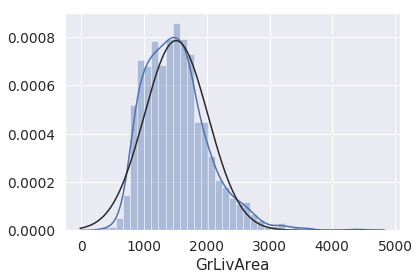

In [21]:
sns.distplot(newDf.GrLivArea, fit=norm)

In [22]:
newDf['GrLivArea'] = np.log(newDf.GrLivArea)

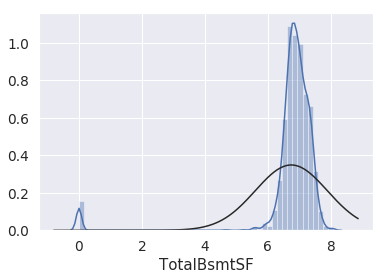

In [28]:
sns.distplot(newDf.TotalBsmtSF, fit=norm)

In [24]:
temp = newDf

In [25]:
newDf = temp

In [29]:
newDf[newDf.TotalBsmtSF == 0].TotalBsmtSF.count()

37

Log transformation of 0 is not possible, but log(1) = 0. So I am putting 1 where TotalBsmtSf is 0, so that my log transform cannot fail.

In [27]:
newDf['TotalBsmtSF'] = newDf['TotalBsmtSF'].apply(lambda x: 1 if x==0 else x)
newDf['TotalBsmtSF'] = np.log(newDf['TotalBsmtSF'])

I am not using any catagorical variable for my model, but if I were to use then we need to transform them to numerical using dummies or one hot encoding

# Prediction Model

In [59]:
X = newDf.iloc[:, :-1]
y = newDf.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8, random_state=10)

In [63]:
#Random Forest Regression
RF = RandomForestRegressor(n_estimators=10000)
RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [78]:
mean_squared_error(y_test, y_predict)

0.033611612908466225

In [79]:
boosting = GradientBoostingRegressor(n_estimators=10000, learning_rate=0.01)
boosting.fit(X_train, y_train)
y_predict1 = boosting.predict(X_test)

/home/krazy/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
mean_squared_error(y_test, y_predict1)

0.033710385367819874

# Finished

## Kaggle submission

In [146]:
test = pd.read_csv("data/housing-price/test.csv")
test = test.set_index('Id')
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [147]:
testCols = ['TotalBsmtSF', 'GrLivArea', 'GarageCars', 'YearBuilt', 'OverallQual', 'FullBath']
test = test[testCols]
test.isnull().sum()

test['TotalBsmtSF'].fillna(test.TotalBsmtSF.mean(), inplace=True)
test['GarageCars'].fillna(test.GarageCars.max(), inplace=True)

In [141]:
test.isnull().sum()

TotalBsmtSF    0
GrLivArea      0
GarageCars     0
YearBuilt      0
OverallQual    0
FullBath       0
dtype: int64

In [142]:
# Needed columns and operations
# testCols = ['TotalBsmtSF', 'GrLivArea', 'GarageCars', 'YearBuilt', 'OverallQual', 'FullBath']
# test = test[testCols]
test['GrLivArea'] = np.log(test.GrLivArea)
test['TotalBsmtSF'] = test['TotalBsmtSF'].apply(lambda x: 1 if x==0 else x)
test['TotalBsmtSF'] = np.log(test['TotalBsmtSF'])

In [148]:
test_predict = RF.predict(test)
test_predict = np.exp(test_predict)

In [144]:
result = pd.DataFrame(data={'Id': test.index, 'SalePrice': test_predict})
result = result.set_index('Id')

In [145]:
result.to_csv('data/housing-price/output.csv')